# Inaugural Project

**Team:** M&M

**Members:** Markus Gorgone Larsen (hbk716) & Matias Bjørn Frydensberg Hall (pkt593)

**Imports and set magics:**

In [8]:
import numpy as np
import copy
from types import SimpleNamespace
from scipy import optimize
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

'We consider a household solving the following maximisation problem when looking to buy a home:


$$
\begin{aligned}
c^*, h^* & =  \text{arg}\max_{c,h}c^{1-\phi}h^\phi\\
& \text{s.t.}\\
\tilde{p}_h & = p_h\epsilon\\
m & = \tau(p_h, \tilde{p}_h) + c\\
\tau(p_h, \tilde{p}_h) & = rp_h +\tau^g\tilde{p}_h + \tau^p max\{\tilde{p}_h - \bar{p}, 0\}
\end{aligned}
$$

Where $c$ is consumption, $h$ is housing quality, $p_h$ is the price of housing, $\epsilon$ is the public housing assement factor, $\phi$ is the Cobb-Douglas weights, $m$ is cash-on-hand, $r$ is the mortgage interest rate, $\tau^g$ is the base housing tax, $\tau^p$ is the progressive housing tax and $\bar{p}$ is the cutoff price for the progressive tax.

As utility is monotonically increasing in consumption and housing quality, and $\tau$ is a function of h, we can define consumption as:
$$
c = m - \tau(p_h, \tilde{p}_h)
$$

Plugging c into the utility function we get the following:
$$
h^* = \text{arg}\max_{h}(m - rh +\tau^gh\epsilon + \tau^p max\{h\epsilon - \bar{p}, 0\})^{1-\phi}h^\phi
$$

The utility function and optimisation function is defined in the module and used to solve the households problem

In [9]:
# a. Create simplenamespace and set parameter values
par = SimpleNamespace()

par.phi = 0.3
par.epsilon = 0.5
par.r = 0.03
par.tau_g = 0.012
par.tau_p = 0.004
par.p_bar = 3
par.m = 0.5
par.seed = 1

# b. Compute optimal housing quality, consumption and utility
h_star, c_star, u_star = inauguralproject.u_optimize(par)

# c. Print solution
print(f'The household will choose optimal housing = {h_star:.2f}, which implies optimal consumption = {c_star:.2f} and utility = {u_star:.2f}')

The household will choose optimal housing = 4.17, which implies optimal consumption = 0.35 and utility = 0.74


# Question 2

First we create an array of equally spaced values of m using linespace for values between 0.4 and 1.5. We also create arrays as contains for h, c and u values. We then find the optimal values by looping over the values of m. Finally we plot the two graphs. We observe that when m is in the range of 0.72 to about 0.75 optimal housing is unchanged at 6, while consumption increase more rapidly in this range. This is due to the cutoff price. In this range it is more benificial for the household to spend little more than 70% on consumption due to the fact that higher housing quality would increase taxes which in the interval offsets the higher utility from higher housing quality.

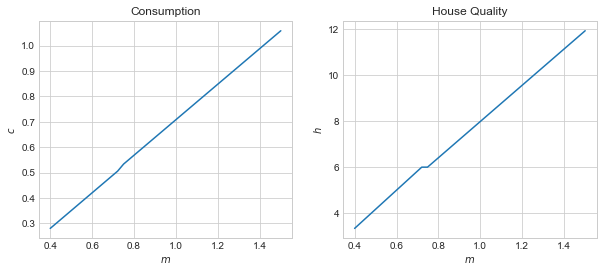

In [10]:
# a. Create array of m's and container for h*, c* and u*
N = 1000
m_vec = np.linspace(0.4, 1.5, N)
h_vec = np.zeros(N)
c_vec = np.zeros(N)
u_vec = np.zeros(N)

# b. Loop the optimise function over the m_vec array
for i in range(N):
    par.m = m_vec[i]
    h_vec[i], c_vec[i], u_vec[i] = inauguralproject.u_optimize(par)

# c. Create graph and plot
inauguralproject.two_figures(m_vec, c_vec, "Consumption", "$m$", "$c$", m_vec, h_vec, "House Quality", "$m$", "$h$")

# Question 3

In the module we define a function to calculate the total tax burden given the utility function.

In [11]:
# a. Adding population size, mean and standard deviation to namespace of parameters
par.pop = 10000
par.mu = -0.4
par.sigma = 0.35

# b. Compute the total tax burden
T = inauguralproject.tax_total(par)

# c. Print the answer
print(f'The average tax burden pr. household is {T/par.pop:.3f}')

The average tax burden pr. household is 0.036


## Bonus

Using the parameters an array of lognormal distributed m's is created. We also create containers for the h, c and u values. We then find the optimal values by looping over the values of m. Finally we plot the findings as histograms. <br>
Both the distribution of m and h resembel right skewed normal distrubutions, not suprising given m's log-normal distribution. There is nothing odd about m's distrubution, but the distrubution of h is odd since it has a large concentration around a value of 6. This is due to the effect of the progressive tax as described in question 2.

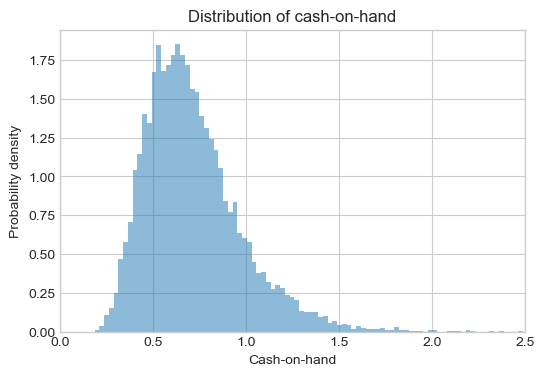

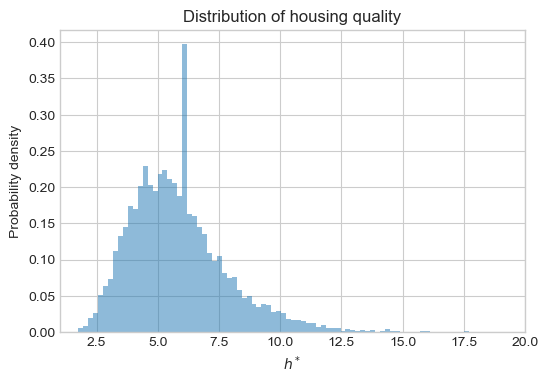

In [12]:
# a. Resetting seed and create array of m's and container for h*, c* and u* in our population
np.random.seed(par.seed)

m_pop = np.random.lognormal(par.mu, par.sigma, par.pop)
h_pop = np.zeros(par.pop)
c_pop = np.zeros(par.pop)
u_pop = np.zeros(par.pop)

# b. Compute optimal housing quality, consumption and utility for whole population
for i in range(par.pop):
    par.m = m_pop[i]
    h_pop[i], c_pop[i], u_pop[i] = inauguralproject.u_optimize(par)
    
# c. Create histograms to plot distributions
bonus1 = plt.figure(dpi=100)
ax_left = bonus1.add_subplot(1,1,1)
ax_left.hist(m_pop,bins=100,density=True,alpha=0.5,label='cash-on-hand')
ax_left.set_xbound(0, 2.5)
ax_left.set_xlabel('Cash-on-hand')
ax_left.set_ylabel('Probability density')
ax_left.set_title('Distribution of cash-on-hand')

bonus2 = plt.figure(dpi=100)
ax_right = bonus2.add_subplot(1,1,1)
ax_right.hist(h_pop,bins=100,density=True,alpha=0.5,label='housing')
ax_right.set_xbound(1,20)
ax_right.set_xlabel('$h^*$')
ax_right.set_ylabel('Probability density')
ax_right.set_title('Distribution of housing quality');

# Question 4

We create a new namespace and change parametervalues. Then we use our tax function to find the total tax burden. We find that the average tax burden increases after the reform.

In [13]:
# a. Create a new namespace of parameters by copy and change parameter values
par2 = copy.copy(par)

par2.epsilon = 0.8
par2.tau_g = 0.01
par2.tau_p = 0.009
par2.p_bar = 8

# b. Compute the total tax after the reform
T_reform = inauguralproject.tax_total(par2)

# c. Print the answer
print(f'The average tax burden pr. household after the reform is {T_reform/par.pop:.3f}')

The average tax burden pr. household after the reform is 0.045


# Question 5

We add the tax burden found in Q3 as the policy maker's tax burden goal. We then compute the new $\tau_g$ using the root optimising function as defined in the module. Lastly we check that the tax burden is indeed the same as before the reform.

In [14]:
# a. Add the tax burden goal as a parameter
par2.T_goal = T

# b. Calculate the new tau_g and tax burden hereof and add to parameters
tau_g = inauguralproject.base_tax_pct(par2)
par2.tau_g = tau_g
T_reform2 = inauguralproject.tax_total(par2)


# c. Print solution
print(f'The base tax rate that leaves the average tax burden unchanged at {T_reform2/par2.pop:.3f} is tau_g = {tau_g:.4f}')

The base tax rate that leaves the average tax burden unchanged at 0.036 is tau_g = 0.0077


Below we calculate some tax effects to get a better idea of the distribution effects of the tax change.

In [39]:
# a. find change to the base tax level
# calculate epsilon*tau_g both before and after and deduct before from after:
print(f'The change in the base tax level is {par2.epsilon*par2.tau_g - par.epsilon*par.tau_g:.5f} pct. points')

# b. find change to the cutoff tax level
# calculate epsilon*tau_p both before and after and deduct before from after:
print(f'The change in the cutoff tax level is {par2.epsilon*par2.tau_p - par.epsilon*par.tau_p:.5f} pct. points')

# c. find the difference between paying the previous cutoff tax and now paying only the base tax level
# calculate epsilon*tau_g for after and subtract it with epsilon*(tau_p+tau_g) from before
print(f'The total tax level change from paying the old cutoff tax level to paying the new base tax\
level is {par2.epsilon*par2.tau_g - par.epsilon*(par.tau_p+par.tau_g):.5f} pct. points')


The change in the base tax level is 0.00014 pct. points
The change in the cutoff tax level is 0.00520 pct. points
The total tax level change from paying the old cutoff tax level to paying the new base taxlevel is -0.00186 pct. points


Hence even though the base tax rate is lowered, the change in which the public evaluates housing, makes it so that the base housing tax payment is higher than before. Not suprisingly we also find that the top tax level increases. However, the cutoff limit for paying this higher tax is set significantly higher than before, so only the really wealthy pay it. As we find above the people no longer paying the cutoff tax are paying a lower rate. This makes it so we can seperate distrubution changes into three categories:  

* The households who are paying the base tax rate before and after, are slightly worse off because of a higher evaluation of their housing
* The households who payed the cutoff tax before but no longer does are better off
* The households who pay the cutoff tax both before and after are worse off

# Conclusion

In this assignment we have solved a households utility maximisation problem with respect to housing quality and other consumption. When plotting the optimal housing quality and other consumption for cash-on-hand in the range 0.4 to 1.5, we observe a flat housing quality curve at a value of 6 in the interval of 0.72 to about 0.75, while consumption increase at a higher rate in that interval. As described earlier in the assignment this is a consequence of the progressive housing tax where the extra cost of housing offsets the utility gain from better housing quality, so just increasing consumption gives the household the highest utility.

In Q3 we calculate the average tax burden pr. household in a population with lognormally distributed cash-on-hand. We also plot the distributions of cash-on-hand and housing quality, and notice that the cash-on-hand look as expected, but there is a cluster of households who choose a housing quality of 6. This is of course due to the progressive housing tax as described above. In Q4 we find that the average tax burden pr. household increase after the tax reform.

At last in Q5 we find that in order to keep the tax burden pr. household the same as before the reform the policy maker should set the base housing tax to 0.77%. This change in the reform would redistribute wealth from households in the top and bottom distribution of cash-on-hand to households in the middle of the distribution who payed the cutoff tax before but no longer does.
